Лунгу А.С. 17Э2

In [109]:
import pandas as pd 
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import scipy.cluster.hierarchy as hclust
import seaborn as sns
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN, KMeans

In [6]:
data = pd.read_csv('minor_iad_3_7.csv')
data.head()

,Length,Width,Thickness,Working Width,Epoch
0,6.495556,5.959913,1.827674,1.160894,1.0
1,7.420673,5.568505,1.999907,1.095279,2.0
2,11.449685,3.416172,1.161395,3.924651,4.0
3,9.655261,4.441789,1.024824,3.803635,5.0
4,7.157643,5.403990,2.480654,0.960678,3.0


Задание 1

In [8]:
class PAM:

    def __init__(self, data, dist, k):
        """
        :param data: данные в виде DataFrame 
        :param dist: одно из расстояний ['euclidean', 'cityblock', 'chebyshev', 'minkowski', 'cosine'] 
        :param k: кол-во кластеров 
        """
        self.data = data
        self.k = k
        self.dist = dist
        

    
    def clustering(self, medoids_idx):
        """ 

        :param medoids_idx: выбранные рандомные объекты, которые являются медоидами 
        :return: 
        """

        data = self.data.values
        size = len(data)
        total_cost = 0.0
        medoids = {}
        for idx in medoids_idx:
            medoids[idx] = []

        for i in range(size):
            choice = -1
            min_cost = float('inf')
            for m in medoids:
                vector1 = np.array(data[m])
                vector2 = np.array(data[i])
                dist = pdist([vector1, vector2], self.dist)
                # clustering
                if dist < min_cost:
                    choice = m
                    min_cost = dist
            # завершение вычислений
            medoids[choice].append(i)
            total_cost += min_cost

        return (total_cost, medoids)

    def pam(self):
        """ 
        1. Инициализация: случайным образом выбираем k точек в качестве центров медоидов 
        2. Ассоциируем каждую точку из набора данных с ближайшим медоидом. степень близости определяется расстоянием для выбранной метрики 
        3. Смена медоидов и пересчет целевой функции 
        4. выбрать кластеризацию, которой соответствует наименьшее значение целевой функции. 
        5. повторить пункты 2 - 4 до тех пор пока медоиды не прекратят изменяться. 
        :return: Целевая функция, медоиды и метки кластеров 
        """
        data = self.data.values
        size = len(data)
        # rand medoids
        medoids_idx = []
        for i in range(self.k):
            rand_med = rd.randint(0, len(self.data) - 1)
            medoids_idx.append(rand_med)
        pre_cost, medoids = self.clustering(medoids_idx)

    

        inertia = pre_cost
        best_choice = medoids_idx
        best_res = dict(medoids)
        iter_count = 0

        while True:
            # выбираем здесь наши кластеры
            for m in medoids:
                # проходимся по каждому объекту в этом m кластере
                for item in medoids[m]:
                    # если данный объект не медоида, то меняем местами нашу метоиду
                    if item != m:
                        # меняем m и o - сохраняем idx
                        #  берем сначала индекс нашего m медоида
                        idx = medoids_idx.index(m)
                        # в другую переменную записываем наш m метоид
                        swap_temp = medoids_idx[idx]
                        # а на место m медоида ставим наш объект item
                        medoids_idx[idx] = item
                        # снова пересчитываем кластеры и целевую функцию
                        tmp_cost, tmp_medoids = self.clustering(medoids_idx)
                        # ищем наименьшее значение целевой функции
                        if tmp_cost < inertia:
                            best_choice = list(medoids_idx)  # копируем данные
                            best_res = dict(tmp_medoids)  # копируем данные
                            inertia = tmp_cost
                        # обратная замена m и o
                        medoids_idx[idx] = swap_temp
            # увеличиваем счетчик итераций
            iter_count += 1

            # если сосстав наших метоидов не изменился, то сымсла алгоритма нет и он останавливается
            if best_choice == medoids_idx:
                break

            # обновляем значения целевой функции и медоидов
            if inertia < pre_cost:
                pre_cost = inertia
                medoids = best_res
                medoids_idx = best_choice
        # записываем наши метки кластеров
        labels = [i for i in range(size)]
        for key in best_res.keys():
            for val in best_res[key]:
                labels[val] = key
        return (inertia, best_choice, labels)

In [9]:
pam = PAM(data, 'euclidean', 6)
best_cost, medoids, medoids_labels = pam.pam()

print('Целевая функция: ')
print(best_cost)
print('Медоиды: ')
print(medoids)
print('Лейблы: ')
print(medoids_labels)

Целевая функция: 
[1303.13936131]
Медоиды: 
[200, 238, 212, 34, 191, 195]
Лейблы: 
[191, 191, 238, 238, 191, 212, 200, 195, 191, 238, 191, 34, 238, 191, 200, 191, 191, 238, 238, 200, 212, 238, 191, 34, 238, 200, 238, 195, 212, 200, 238, 195, 191, 238, 34, 212, 191, 238, 191, 212, 200, 195, 212, 34, 200, 238, 34, 212, 200, 212, 212, 34, 238, 191, 191, 212, 238, 200, 191, 200, 212, 212, 238, 212, 195, 191, 195, 238, 212, 238, 200, 195, 34, 200, 212, 191, 191, 212, 238, 238, 238, 191, 34, 200, 191, 191, 212, 34, 34, 34, 200, 191, 212, 34, 191, 238, 191, 212, 238, 34, 191, 238, 34, 191, 238, 212, 191, 238, 191, 34, 191, 195, 195, 238, 34, 200, 34, 191, 238, 34, 191, 191, 212, 200, 34, 34, 212, 200, 191, 212, 212, 191, 212, 195, 212, 212, 191, 238, 191, 238, 195, 212, 200, 238, 34, 34, 200, 238, 200, 238, 212, 195, 212, 200, 200, 34, 238, 34, 34, 200, 238, 212, 191, 191, 212, 238, 200, 200, 212, 191, 195, 238, 212, 238, 238, 238, 212, 212, 200, 34, 212, 200, 238, 212, 195, 191, 212, 212, 20

Задание 2

In [16]:
n_ar = normalize(data)
# X = data.as_matrix()
n_data = pd.DataFrame(n_ar)
X = n_data.as_matrix()
X

C:\Users\marte\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


array([[0.71126434, 0.6526113 , 0.20013061, 0.12711803, 0.10950014],
       [0.76024984, 0.57049471, 0.20489095, 0.11221161, 0.20490051],
       [0.86423856, 0.25785757, 0.08766379, 0.29623826, 0.30192571],
       ...,
       [0.92110827, 0.10487967, 0.11281963, 0.12472354, 0.33507549],
       [0.9442177 , 0.11266405, 0.10530777, 0.1173346 , 0.26627544],
       [0.8298286 , 0.11196306, 0.10737598, 0.13775783, 0.51801733]])

№ 2.1

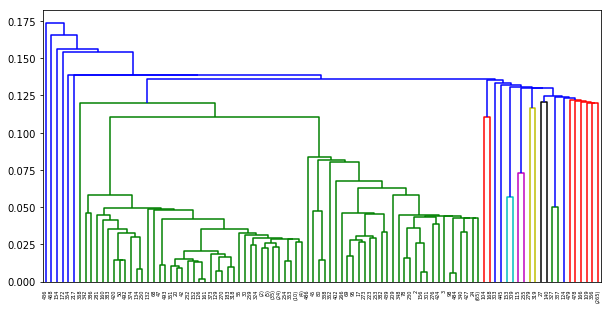

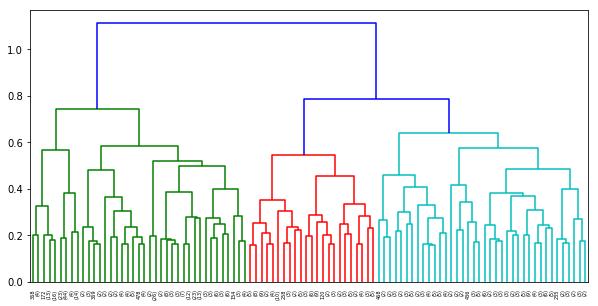

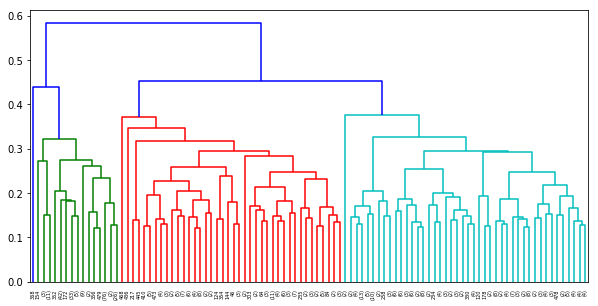

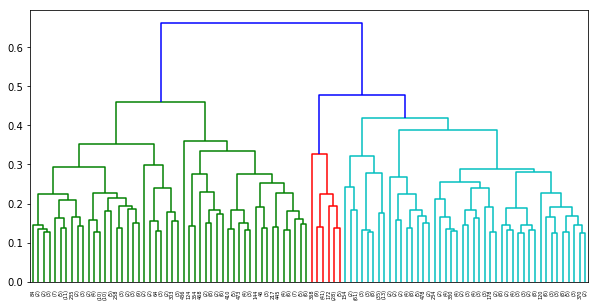

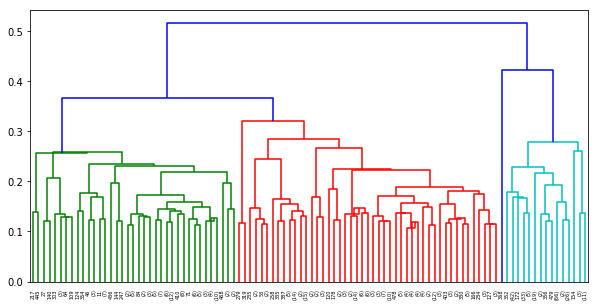

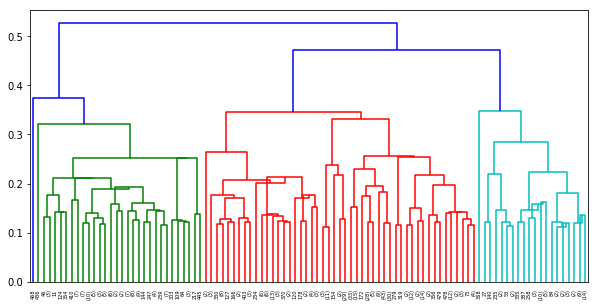

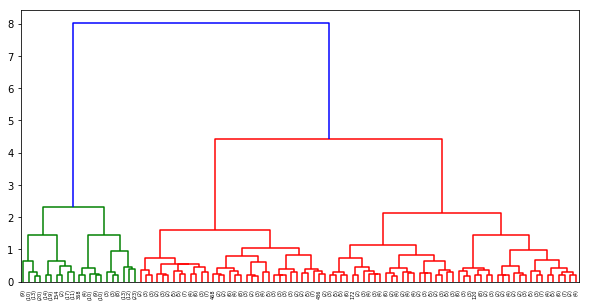

In [50]:
Z = linkage(X, 'single')
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Z, p = 20, truncate_mode='level')
plt.show()


Z = linkage(X, 'complete')
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Z, p = 100, truncate_mode='lastp')
plt.show()

Z = linkage(X, 'average')
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Z, p = 100, truncate_mode='lastp')
plt.show()

Z = linkage(X, 'weighted')
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Z, p = 100, truncate_mode='lastp')
plt.show()


Z = linkage(X, 'centroid')
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Z, p = 100, truncate_mode='lastp')
plt.show()


Z = linkage(X, 'median')
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Z, p = 100, truncate_mode='lastp')
plt.show()

Z = linkage(X, 'ward')
fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Z, p = 100, truncate_mode='lastp')
plt.show()

№ 2.2 DBSCAN

In [ ]:
Подбор оптимальных параметров для DBSCAN

In [66]:
dists = ['euclidean', 'canberra', 'chebyshev', 'cityblock',
         'cosine']
possible_m = [3, 4, 5, 6, 7, 8, 9] #Где-то нашел, что чаще всего берут от 3 до 9
possible_eps = [0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29]
eps = 0
max_sil = 0
m_s = 0
for dist in dists:
    for i in possible_m:
        for j in possible_eps:
            cl_dbscan = DBSCAN(eps=j, min_samples=i, metric=dist).fit(n_data)
            try:
                sil = metrics.silhouette_score(n_data, cl_dbscan.labels_)
            except:
                continue
            if max_sil < sil:
                max_sil = sil
                eps = j
                m_s = i
                metric = dist

print('Значение silhouette -', max_sil)
print('Оптимальное расстояние -', metric)
print('Оптимальное значение eps =', eps)
print('Оптимальное значение min_samples =', m_s)

Значение silhouette - 0.3788314466527179
Оптимальное расстояние - euclidean
Оптимальное значение eps = 0.14
Оптимальное значение min_samples = 6


 0    279
 1    210
-1     11
dtype: int64
Silhouette: 0.3788314466527179


C:\Users\marte\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\marte\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\marte\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\marte\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


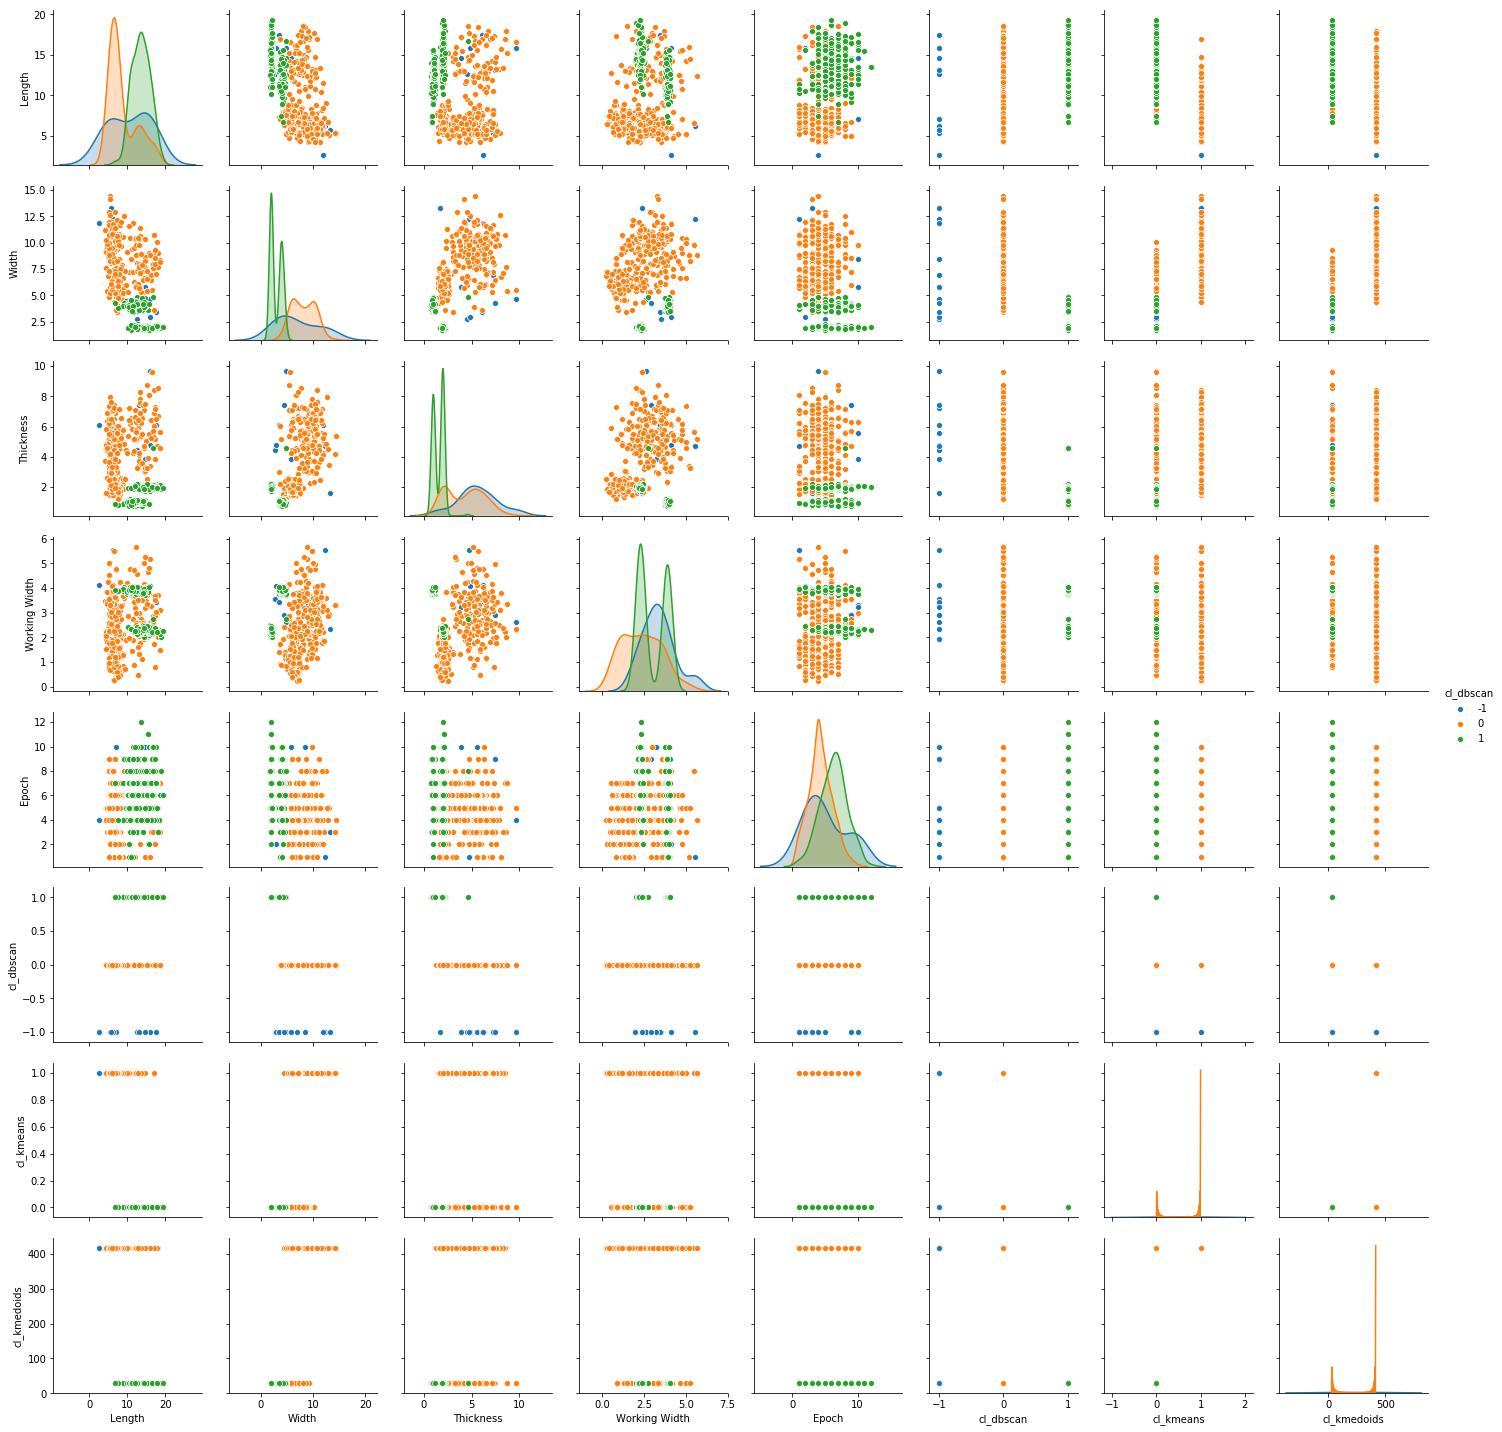

In [107]:
cl_dbscan = DBSCAN(eps = 0.14, min_samples = 6, metric='euclidean').fit(n_data)

print('Silhouette: ' + str(metrics.silhouette_score(n_data, cl_dbscan.labels_)))
print(pd.Series(cl_dbscan.labels_).value_counts())

data['cl_dbscan'] = cl_dbscan.labels_

p = sns.pairplot(hue='cl_dbscan',
              data = data)

№ 2.3 KMeans

In [75]:
По анализу дендрограм и результату DBSCAN (2 полноценных кластера и шум), можно сделать вывод, что кластера 2

Silhouette: 0.46993850987167046
1    279
0    221
dtype: int64


C:\Users\marte\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\marte\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\marte\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\marte\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


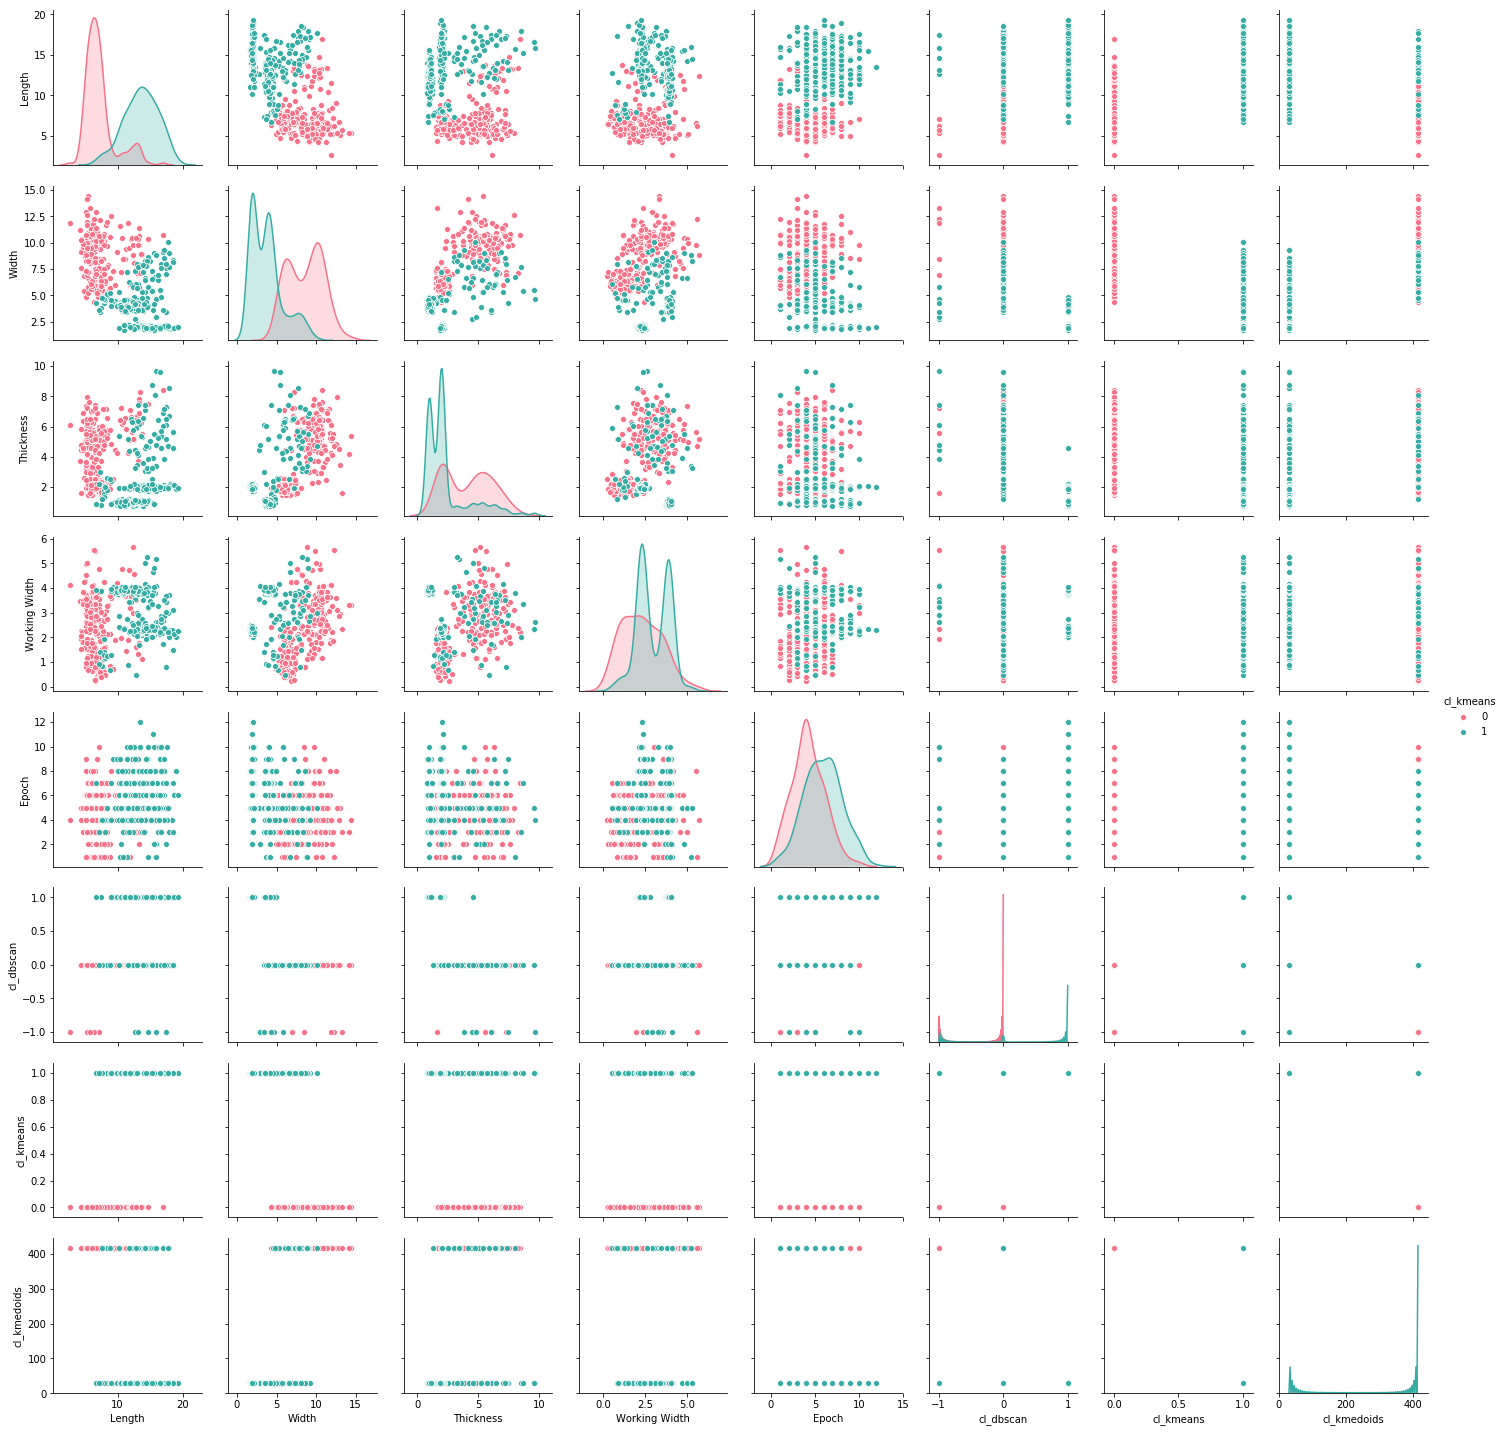

In [108]:
model = KMeans(n_clusters = 2, n_init = 50, max_iter = 150, init = 'k-means++')
model.fit(n_data)
print('Silhouette: ' + str(metrics.silhouette_score(n_data, model.labels_)))
print(pd.Series(model.labels_).value_counts())
data['cl_kmeans'] = model.labels_

sns.pairplot(data=data, hue = 'cl_kmeans', palette = "husl")

In [90]:
Показатель Silhouette довольно высокий, а значит догадка о двух кластерах была верна

№ 2.4 PAM

In [ ]:
По описанным выше причинам используем 2 кластера

In [105]:
#Используем алгоритм из первого задания
pam = PAM(n_data, 'euclidean', 2)
best_cost, medoids, medoids_labels = pam.pam()
print(medoids_labels)

[416, 416, 30, 30, 416, 30, 416, 416, 416, 30, 416, 416, 30, 416, 30, 416, 416, 30, 30, 416, 30, 30, 416, 416, 30, 416, 30, 416, 30, 30, 30, 416, 416, 30, 416, 30, 30, 30, 30, 30, 416, 416, 30, 416, 30, 30, 416, 30, 416, 30, 30, 416, 30, 416, 416, 30, 30, 416, 416, 416, 30, 30, 30, 30, 416, 416, 416, 30, 30, 30, 416, 416, 416, 30, 30, 416, 416, 30, 30, 30, 30, 416, 416, 30, 416, 416, 30, 416, 416, 416, 30, 416, 30, 416, 416, 30, 30, 30, 30, 416, 416, 30, 416, 416, 30, 30, 30, 30, 416, 416, 416, 416, 416, 30, 416, 416, 416, 416, 30, 416, 416, 416, 30, 416, 416, 416, 30, 416, 30, 30, 30, 416, 30, 416, 30, 30, 416, 30, 416, 30, 416, 30, 416, 30, 416, 416, 416, 30, 30, 30, 30, 416, 30, 30, 30, 416, 30, 416, 416, 30, 30, 30, 416, 416, 30, 30, 416, 416, 30, 416, 416, 30, 30, 30, 30, 30, 30, 30, 416, 416, 30, 416, 30, 30, 416, 416, 30, 30, 30, 30, 30, 416, 416, 30, 416, 416, 416, 30, 30, 416, 416, 416, 30, 30, 416, 30, 416, 30, 30, 30, 30, 416, 30, 416, 416, 416, 30, 416, 30, 30, 30, 30, 30, 

Silhouette: 0.46152122077855096
30     252
416    248
dtype: int64


C:\Users\marte\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\marte\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\marte\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\marte\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


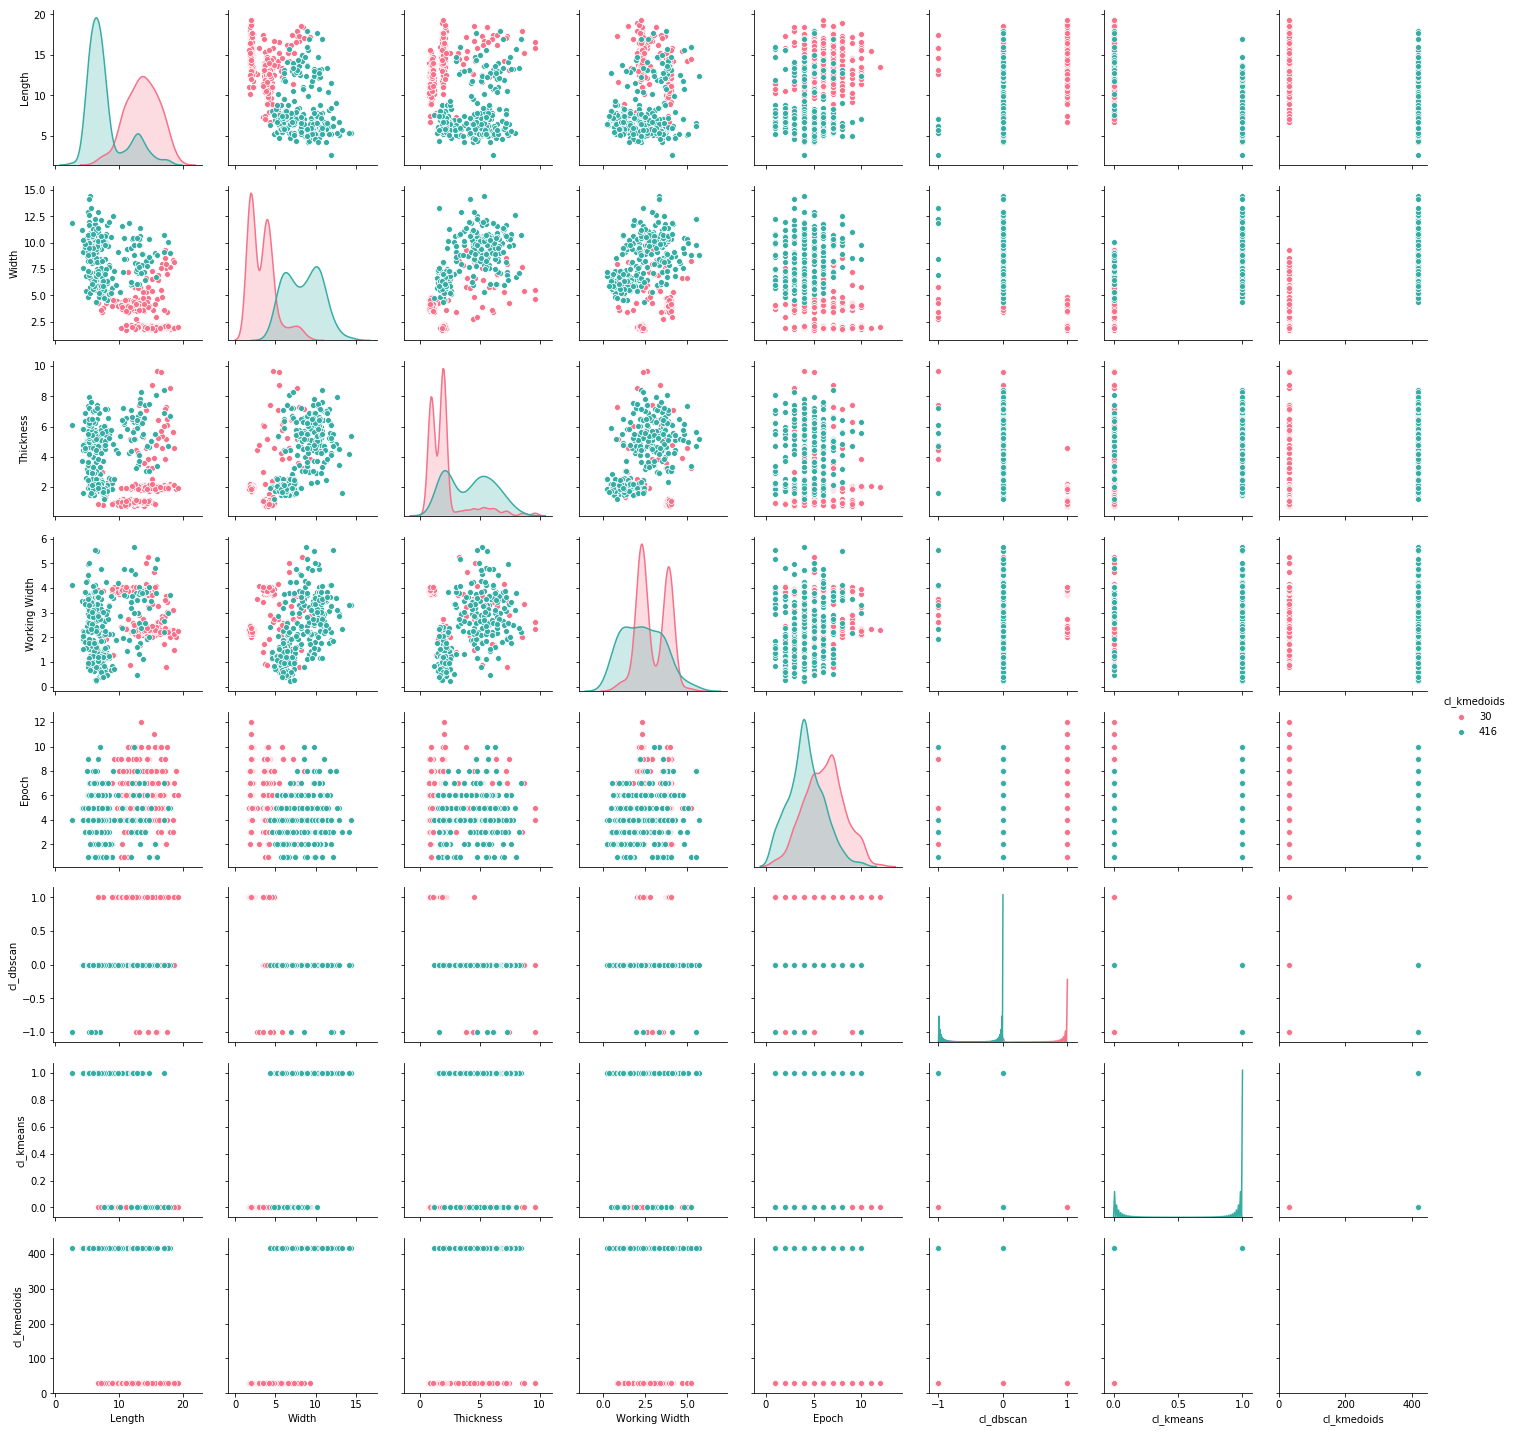

In [106]:
print('Silhouette: ' + str(metrics.silhouette_score(n_data, medoids_labels)))
print(pd.Series(medoids_labels).value_counts())

data['cl_kmedoids'] = medoids_labels

sns.pairplot(data=data, hue = 'cl_kmedoids', palette = "husl")

Эффективность алгоритма PAM оказалась довольно высокой, но лучше всех показал себя KMeans

№ 2.6-7

In [116]:
data.head()
data_1cl = data[data['cl_kmeans'] == 0]
data_1cl.head()

,Length,Width,Thickness,Working Width,Epoch,cl_dbscan,cl_kmeans,cl_kmedoids
0,6.495556,5.959913,1.827674,1.160894,1.0,0,0,416
1,7.420673,5.568505,1.999907,1.095279,2.0,0,0,416
4,7.157643,5.403990,2.480654,0.960678,3.0,0,0,416
6,11.080952,8.474849,6.557333,3.688074,4.0,0,0,416
7,8.494637,7.929636,5.804521,3.291199,6.0,0,0,416


Если посмотреть на датафрейм, то можно увидеть, что все 3 алгоритма разбили данные на кластеры схожим образом

In [114]:
data_2cl = data[data['cl_kmeans'] == 1]
data_2cl.head()

,Length,Width,Thickness,Working Width,Epoch,cl_dbscan,cl_kmeans,cl_kmedoids
2,11.449685,3.416172,1.161395,3.924651,4.0,1,1,30
3,9.655261,4.441789,1.024824,3.803635,5.0,1,1,30
5,17.004227,1.993792,1.989756,2.269049,5.0,1,1,30
9,13.571746,4.651697,1.091561,3.805405,6.0,1,1,30
12,14.028797,3.887451,0.962795,3.924227,7.0,1,1,30


In [117]:
data_1cl.describe()

,Length,Width,Thickness,Working Width,Epoch,cl_dbscan,cl_kmeans,cl_kmedoids
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.0,221.0
mean,7.222278,8.663241,4.184032,2.311174,4.280543,-0.022624,0.0,416.0
std,2.322131,2.210082,1.925091,1.196245,1.844656,0.149041,0.0,0.0
min,2.657398,4.346336,1.493821,0.222559,1.000000,-1.000000,0.0,416.0
25%,5.779633,6.583842,2.183412,1.251865,3.000000,0.000000,0.0,416.0
50%,6.661124,8.951737,4.449952,2.218077,4.000000,0.000000,0.0,416.0
75%,7.677513,10.468463,5.728943,3.250160,6.000000,0.000000,0.0,416.0
max,17.001724,14.445089,8.454392,5.673730,10.000000,0.000000,0.0,416.0


In [118]:
data_2cl.describe()

,Length,Width,Thickness,Working Width,Epoch,cl_dbscan,cl_kmeans,cl_kmedoids
count,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.0,279.000000
mean,13.640796,3.794065,2.365443,2.962849,5.942652,0.731183,1.0,67.354839
std,2.596190,1.965458,1.812568,0.918697,2.117996,0.490334,0.0,114.325987
min,6.675849,1.688637,0.769315,0.484856,1.000000,-1.000000,1.0,30.000000
25%,11.832500,2.019148,1.064737,2.278880,4.000000,1.000000,1.0,30.000000
50%,13.780287,3.735063,1.962429,2.594579,6.000000,1.000000,1.0,30.000000
75%,15.589332,4.508943,2.131528,3.876705,7.000000,1.000000,1.0,30.000000
max,19.257837,10.114841,9.661913,5.244843,12.000000,1.000000,1.0,416.000000


Из описательных статистик можно увидеть, что в среднем орудия из первого кластера очень широкие, толстые и в целом негабаритные.
Однако ширина рабочей поверхности у них меньше, чем у второго кластера, орудия которого показывают себя более продвинутыми.
Осмелюсь предподожить, что первый кластер собрал в себе орудия ударного и рубящего типа, а 
второй из-за большой длины, подходящих габаритов для ручного труда и широкой рабочей поверхности, напоминает
земледельческие орудия.